# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [3]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [4]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([670929.0681818182 320602.55 … 612001.2593192869 418183.09523809527; 862765.7329545454 161521.85 … 483041.0632090762 786581.8253968254], [14, 14, 14, 14, 14, 14, 14, 14, 14, 14  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [7.33151035349585e9, 8.5127447147421875e9, 8.775560590144287e9, 4.72277875594165e9, 1.6187390657141113e10, 6.128515981958008e9, 4.887090264661133e9, 8.432457851249512e9, 2.841891040071289e9, 8.434160389880127e9  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [352, 340, 327, 354, 345, 140, 334, 215, 352, 341, 329, 321, 318, 617, 315], [352, 340, 327, 354, 345, 140, 334, 215, 352, 341, 329, 321, 318, 617, 315], 1.351746641566207e13, 17, true)

In [5]:
data[!, :cluster] = string.(assignments(result));

In [6]:
show(data)

5000×3 DataFrame
│ Row  │ x      │ y      │ cluster │
│      │ Int64  │ Int64  │ String  │
├──────┼────────┼────────┼─────────┤
│ 1    │ 664159 │ 550946 │ 14      │
│ 2    │ 665845 │ 557965 │ 14      │
│ 3    │ 597173 │ 575538 │ 14      │
│ 4    │ 618600 │ 551446 │ 14      │
│ 5    │ 635690 │ 608046 │ 14      │
│ 6    │ 588100 │ 557588 │ 14      │
│ 7    │ 582015 │ 546191 │ 14      │
│ 8    │ 604678 │ 574577 │ 14      │
│ 9    │ 572029 │ 518313 │ 14      │
│ 10   │ 604737 │ 574591 │ 14      │
⋮
│ 4990 │ 681053 │ 892766 │ 1       │
│ 4991 │ 683321 │ 873932 │ 1       │
│ 4992 │ 701017 │ 931252 │ 1       │
│ 4993 │ 645677 │ 814395 │ 1       │
│ 4994 │ 677362 │ 853471 │ 1       │
│ 4995 │ 659046 │ 930099 │ 1       │
│ 4996 │ 665426 │ 853940 │ 1       │
│ 4997 │ 691827 │ 863963 │ 1       │
│ 4998 │ 650661 │ 861267 │ 1       │
│ 4999 │ 599647 │ 858702 │ 1       │
│ 5000 │ 684091 │ 842566 │ 1       │

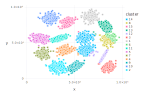

In [8]:
using Gadfly
plot(data, x="x", y="y", color="cluster", Geom.point)